**Feature Engineering in NLP**

In this chapter we don't follow the book, but the section "Encoding Categorical Features Using Embeddings" in Chapter 13 can be an interesting read.
### Introduction
In this section we look at a particular type of machine learning, where the _objects are text documents_ such as  
  
- articles in newspapers
- scientific papers
- e-mails
- reviews on websites
- text messages
    
The aim is to use a set of pre-classified documents to classify those that have not yet been seen. In principle we can use any of the standard methods of classification (Naïve Bayes, Logistic Regression, decision trees etc.) for this task, but datasets of text documents have a number of specific properties compared with the datasets we have seen so far, which require some extra explanation. The main problem is to convert plain text to a format that can be used by the standard classification methods. This is called _feature engineering_. 
  
This subdiscipline of data mining is called **text mining**.   
  
Some of the problems we can solve using text mining are:  
  
- Is this text message SPAM or not? 
- To which of a set of predefined e-mail categories does this e-mail belong? 
- Is this paper about medicine?  Yes/No.
  
### Natural Language Processing (NLP) 
Natural Language Processing (NLP) is a part of computer science and artificial intelligence which deals with _human languages_ (Text Mining in Python: Steps and Examples, 2019).
In other words, NLP is a component of text mining that performs a special kind of linguistic analysis that essentially helps a machine “read” text. It uses a different methodology to _decipher the ambiguities in human language,_ including the following:  
- automatic summarization
- part-of-speech tagging
- disambiguation
- natural language understanding and recognition.

**Part-of-speech-tagging**  is the process of determining to which word category a specific word belongs. Word categories can be for example _verbs_ , _nouns_ , _pronouns_ , etc. 
  
Below we illustrate some of the preparatory task you usual have to perform in text mining projects. We make use of the Python library **NLTK** (**Natural Language Toolkit**, see (NLTK 3.4.5 documentation, sd)), which handles all kinds of NLP topics.  
  
#### Detect language
First of all it’s clear that each language uses it’s own vocabulary. For that reason it might make sense to first determine the language for each document and create a separate classification model per language that occurs in the document set. Languages for which we have too few documents can be left out.

In [1]:
!pip install nltk
!pip install langdetect
import pandas as pd
import numpy as np
import nltk

# in google colab uncomment the following ling
# !pip install langdetect  # install langdetect if necessary (required for google colab)

from langdetect import detect
detect("France is a transcontinental country spanning Western Europe and overseas regions and territories in the Americas and the Atlantic, Pacific and Indian Oceans.")


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached langdetect-1.0.9.tar.gz (981 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993362 sha256=1884b7732509147a91e4132bdcccef3e163c31d57bea066d905e760796678fdd
  Stored in directory: c:\users\jcor864\appdata\local\pip\cache\wheels\c1\67\88\e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


'en'

In [2]:
detect("Frankreich ist ein demokratischer, interkontinentaler Einheitsstaat in Westeuropa mit Überseeinseln und -gebieten auf mehreren Kontinenten.")

'de'

In [3]:
detect("La France, est un État souverain transcontinental dont le territoire métropolitain est situé en Europe de l'Ouest, et dont le territoire ultramarin est situé dans les océans Indien, Atlantique et Pacifique ainsi qu'en Amérique du Sud.")

'fr'

In [4]:
detect("Frankrijk is een land in West-Europa en qua oppervlakte het op twee na grootste Europese land.")

'nl'

In [5]:
detect('Francia es un país transcontinental que se extiende por Europa Occidental y por regiones y territorios de ultramar en América y los océanos Atlántico, Pacífico e Índico.')

'es'

#### Tokenization
**Tokenization** is the process of breaking strings into tokens which in turn are small structures or units. This is typically used for breaking up a string that contains a complete sentence into separate words. 



In [6]:
from nltk.tokenize import word_tokenize
# install the necessary files
nltk.download('punkt')

# sample text for performing tokenization
text = """Controversial trials in which volunteers are intentionally infected with Covid-19 could accelerate vaccine
development, according to the World Health Organization, which has released new guidance on how the approach could 
be ethically justified despite the potential dangers for participants.

So-called challenge trials are a mainstream approach in vaccine development and have been used in malaria, 
typhoid and flu, but there are treatments available for these diseases if a volunteer becomes 
severely sick. For Covid-19, a safe dose of the virus has not been established and there are no failsafe 
treatments if things go wrong."""

# Passing the string text into word tokenize for splitting the text into tokens.
token = word_tokenize(text)
print(token)

['Controversial', 'trials', 'in', 'which', 'volunteers', 'are', 'intentionally', 'infected', 'with', 'Covid-19', 'could', 'accelerate', 'vaccine', 'development', ',', 'according', 'to', 'the', 'World', 'Health', 'Organization', ',', 'which', 'has', 'released', 'new', 'guidance', 'on', 'how', 'the', 'approach', 'could', 'be', 'ethically', 'justified', 'despite', 'the', 'potential', 'dangers', 'for', 'participants', '.', 'So-called', 'challenge', 'trials', 'are', 'a', 'mainstream', 'approach', 'in', 'vaccine', 'development', 'and', 'have', 'been', 'used', 'in', 'malaria', ',', 'typhoid', 'and', 'flu', ',', 'but', 'there', 'are', 'treatments', 'available', 'for', 'these', 'diseases', 'if', 'a', 'volunteer', 'becomes', 'severely', 'sick', '.', 'For', 'Covid-19', ',', 'a', 'safe', 'dose', 'of', 'the', 'virus', 'has', 'not', 'been', 'established', 'and', 'there', 'are', 'no', 'failsafe', 'treatments', 'if', 'things', 'go', 'wrong', '.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Stop word removal
Stop words (of, a, the, in, you, …) do occur very often but have little or no value in determining the topic of a document and are usually removed from texts. Obviously, stop words are language specific and can only be dropped after determining the language. 


In [7]:
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import string
    
def remove_stopwords_en(text):
    stop_words_en = set(stopwords.words('english')) 
    punctuations="?:!.,;<>/\+-"
    # turn the string into a list of words based on separators (blank, comma, etc.)
    word_tokens = word_tokenize(text.lower())
    # create a list of all words that are neither stopwords nor punctuations
    result = [x for x in word_tokens if x not in stop_words_en and x not in punctuations]
    
    # create a new string of all remaining words
    seperator = ' '
    return seperator.join(result)

print(remove_stopwords_en(text))

controversial trials volunteers intentionally infected covid-19 could accelerate vaccine development according world health organization released new guidance approach could ethically justified despite potential dangers participants so-called challenge trials mainstream approach vaccine development used malaria typhoid flu treatments available diseases volunteer becomes severely sick covid-19 safe dose virus established failsafe treatments things go wrong


<>:8: SyntaxWarning: invalid escape sequence '\+'
<>:8: SyntaxWarning: invalid escape sequence '\+'
C:\Users\jcor864\AppData\Local\Temp\ipykernel_27820\3429753381.py:8: SyntaxWarning: invalid escape sequence '\+'
  punctuations="?:!.,;<>/\+-"
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Stemming
Words like welcome and welcoming are essentially about the same topic and can better be combined into a single term for better document classification. Another example is (playing, plays, played). This process is called stemming. However, this technique is far from accurate as it is based on certain rules (like removing suffixes -e or -ing) and can cause some irrelevant results. 
  
![](https://github.com/HOGENT-Databases/DB3-Workshops/blob/master/notebooks/images/stemming.jpg?raw=1)


In [8]:
# Stemming: examples
from nltk.stem.snowball import SnowballStemmer

englishStemmer=SnowballStemmer("english")

stm = ["welcome", "welcoming"]
for word in stm:
    print(word + ":" + englishStemmer.stem(word))
print()
    
stm = ["ball", "balls"]
for word in stm:
    print(word + ":" + englishStemmer.stem(word))
print()

stm = ["waited", "waiting", "waits"]
for word in stm:
    print(word + ":" + englishStemmer.stem(word))
print()

stm = ["giving", "give", "given", "gave"]
for word in stm:
    print(word + ":" + englishStemmer.stem(word))
print()


welcome:welcom
welcoming:welcom

ball:ball
balls:ball

waited:wait
waiting:wait
waits:wait

giving:give
give:give
given:given
gave:gave



In [9]:
dutchStemmer=SnowballStemmer("dutch")

stm = ["worden", "wordt"]
for word in stm:
    print(word + ":" + dutchStemmer.stem(word))
print()
    
stm = ["dader", "daders", "daad"]
for word in stm:
    print(word + ":" + dutchStemmer.stem(word))
print()

stm = ["las", "lezen", "gelezen", "lees"]
for word in stm:
    print(word + ":" + dutchStemmer.stem(word))
print()

worden:word
wordt:wordt

dader:dader
daders:dader
daad:dad

las:las
lezen:lez
gelezen:gelez
lees:les



In [10]:
# Stemming: replace words by stem
def stemming_en(text):
    word_tokens = word_tokenize(text.lower()) 
    seperator = ' '
    result = [englishStemmer.stem(x) for x in word_tokens]
    return seperator.join(result)

print(stemming_en(text))

controversi trial in which volunt are intent infect with covid-19 could acceler vaccin develop , accord to the world health organ , which has releas new guidanc on how the approach could be ethic justifi despit the potenti danger for particip . so-cal challeng trial are a mainstream approach in vaccin develop and have been use in malaria , typhoid and flu , but there are treatment avail for these diseas if a volunt becom sever sick . for covid-19 , a safe dose of the virus has not been establish and there are no failsaf treatment if thing go wrong .


#### Lemmatization
Lemmatization is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.  
  
For example, lemmatization would correctly identify the base form of ‘caring’ to ‘care’, whereas, stemming would cutoff the ‘ing’ part and convert it to car.  
  
Both stemming and lemmatization are also language specific and are not yet available to the same extent for all languages in the Python libraries. (Jabeen, Hafsa; Datacamp, 2018)

![](https://github.com/HOGENT-Databases/DB3-Workshops/blob/master/notebooks/images/lemmatization.png?raw=1)

In [11]:
# Lemmatization
nltk.download('all')   # download wordlist
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
 
print("rocks:", lemmatizer.lemmatize("rocks")) 
print("corpora:", lemmatizer.lemmatize("corpora"))

words = ["gone", "going", "went"]
for word in words:
    print(word + ":" + lemmatizer.lemmatize(word))
    

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\jcor864\AppData\Roaming\nltk

rocks: rock
corpora: corpus
gone:gone
going:going
went:went


In [12]:
def lemmatizing_en(text):
    word_tokens = word_tokenize(text.lower()) 
    seperator = ' '
    result = [lemmatizer.lemmatize(x) for x in word_tokens]
    return seperator.join(result)

print(lemmatizing_en(text))

controversial trial in which volunteer are intentionally infected with covid-19 could accelerate vaccine development , according to the world health organization , which ha released new guidance on how the approach could be ethically justified despite the potential danger for participant . so-called challenge trial are a mainstream approach in vaccine development and have been used in malaria , typhoid and flu , but there are treatment available for these disease if a volunteer becomes severely sick . for covid-19 , a safe dose of the virus ha not been established and there are no failsafe treatment if thing go wrong .


#### Using n-grams
Instead of counting single words as we did here, we could count sequences of words, like “clean match” and “close election”. Of course, to use this we will need some language aware tools. You can use the free, open source NLP libray SpaCy for generating n-grams. 

### Representing text documents for data mining
#### Terms frequency
In the introduction we saw we can use the classification methods we already know. 

This _Bag-of-Words model_ is simple: it builds a vocabulary from a corpus of documents and counts how many times the words appear in each document. To put it another way, each word in the vocabulary becomes a feature and a document is represented by a vector with the same length of the vocabulary (a “bag of words”):
- One row per document. Consider the term “document” to be any text one can access regardless of the format, from text in a word document to just a standalone string variable.
- One column per unique word in the complete collection of documents
- In each cell we then write the number of times (the frequency) the corresponding word occurs in the document. This is called the term frequency (tf) approach.  

For instance, let’s take 3 sentences and represent them with this approach:

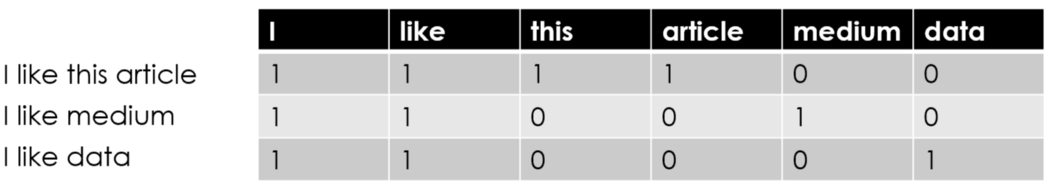



You could determine the frequency distribution of the words in a token in Scikit-Learn using `CountVectorizer()`:

- As you can imagine, this approach causes a significant dimensionality problem: the more documents you have the larger is the vocabulary, so the feature matrix will be a huge sparse matrix. 
- Therefore, the Bag-of-Words model is usually preceded by an important preprocessing (word cleaning, stop words removal, stemming/lemmatization) aimed to reduce the dimensionality problem.

Terms frequency is not necessarily the best representation for text. In fact, you can find in the corpus common words with the highest frequency but little predictive power over the target variable. 

#### TF-IDF

To address this problem there is an advanced variant of the Bag-of-Words that, instead of simple counting, uses the **term frequency–inverse document frequency** (or Tf–Idf). Basically, the value of a word increases proportionally to count, but it is inversely proportional to the frequency of the word in the corpus.  
   
\begin{equation}
score\ =\ tf\ \ast\ idf
\end{equation}  
where
\begin{equation}
tf=term\ frequency\ \left(see\ above\right)
\end{equation} 
  
\begin{equation}
idf_t=log\left(\frac{N}{df_t}\right)
\end{equation}  
  
\begin{equation} 
N=total\ number\ ofdocuments
\end{equation}  
  
\begin{equation} 
df_t=the\ number\ of\ documents\ in\ which\ term\ t\ occurs
\end{equation}  
  
Clearly, this approach corrects for terms that occur in many documents. This does make sense since in document classification we really want to find the words in each document that distinguish that document from others in the collection. If a word occurs in (almost) all documents it isn’t of great help in categorizing this document.  
  
__Example__
  
_Document 1:_  
>**36 dead, 47 injured in Shanghai New Year's celebration stampede**  
>As Asia kicks off 2015, one New Year's celebration in Shanghai, China has resulted in 35 deaths and 42 injuries. China's CCTV America reports that the event, held in Chen Yi Square, near a waterfront area called the Bund, devolved into a stampede.  
   
_Document 2:_  
>**Inside 'New Year's Rockin' Eve' live from Times Square**  
>Welcome 2015 and welcome to New York City. Regardless of where you're welcoming the new year, all TVs will soon be tuned to  watch the ball drop on 'New Year's Rockin' Eve,'the annual televised event centered round the ceremonial ball drop in New York City's Times Square.  
  
_Document 3:_
>**Gwyneth Paltrow Reveals She and Chris Martin Should Probably Have Stayed Married**  
>In the latest issue of Harper's Bazaar U.K., actress and lifestyle guru Gwyneth Paltrow reflects on her relationship with ex-husband Chris Martin, and talks about the influence of her late father.

  
Now let’s compare _tf_ and _tf-idf_ for the three documents and for the words _new_ and _china_.  
   
$N = 3$  
  
In Document 1:  
- new:  
  
  $tf = 2$  
  $idf = log\left(\frac{3}{2}\right)=0.18$  
  $tf*idf = 0.36$  
  
  
- china:  
  
  $tf = 2$  
  $idf = log\left(\frac{3}{1}\right)=0.48$  
  $tf*idf = 0.96$  
   
We see that the words _china_ and _new_ both occur twice in document 1 but _china_ is getting a much higher _tf-idf_ score (0.96 vs. 0.36) because this is the only document in which it occurs. So the word _china_ is telling more about this document than the word _new_ and this is reflected in the _tf-idf_ score. 

Now let’s compare tf and tf-idf for the three documents and for six words.

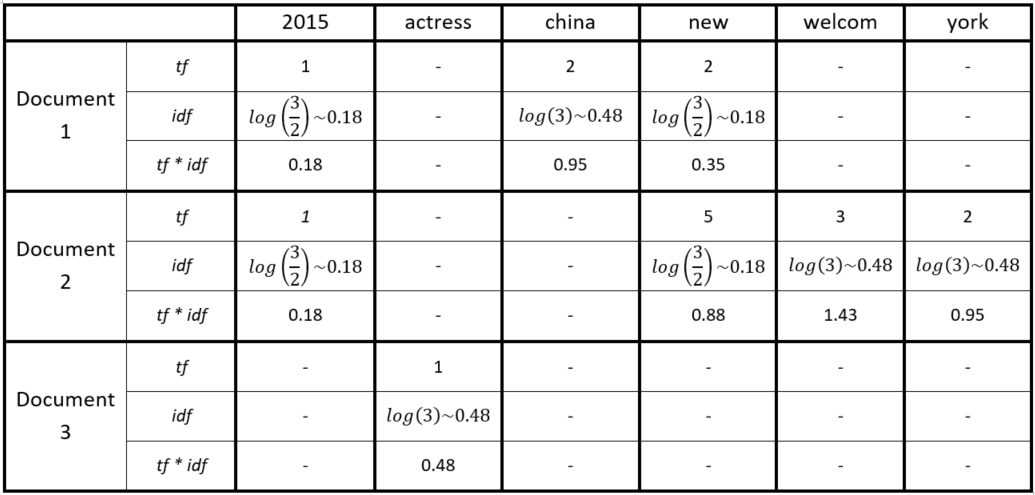

This table, of course with only the tf*idf values, is going to be used as feature table when building a model based on tf-idf values. 

The `TFidfVectorizer()` is a great tool from Scikit-Learn to calculate the tf-idf score for each distinct word in the complete data set. It creates a matrix in which the number of rows equals the number of documents (e.g. the number of e-mails in the training set of an e-mail classifier) and the number of columns equals the number of distinct words in the complete set of documents. Each cell contains the tfidf score for the corresponding word in the corresponding document.

The function `get_feature_names_out()` of `TFidfVectorizer()` return all the differents words in the document set.

Both `TFidfVectorizer()` and `CountVectorizer()` can be used in a transformation Pipeline.

In [13]:
# Apply TfidVectorizer in Python

from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
text = ['a man and a cat', 'a man and a dog']
X = vec.fit_transform(text)
print(vec.get_feature_names_out())

['and' 'cat' 'dog' 'man']


In [14]:
X.toarray()

array([[0.50154891, 0.70490949, 0.        , 0.50154891],
       [0.50154891, 0.        , 0.70490949, 0.50154891]])

### Word Embedding

_Word embeddings_ are a family of natural language processing techniques aiming at mapping semantic meaning into a geometric space. This is done by associating a numeric vector to every word in a dictionary, such that the distance (e.g. L2 distance or more commonly cosine distance) between any two vectors would capture part of the semantic relationship between the two associated words. The geometric space formed by these vectors is called an embedding space.

For instance, "coconut" and "polar bear" are words that are semantically quite different, so a reasonable embedding space would represent them as vectors that would be very far apart. But "kitchen" and "dinner" are related words, so they should be embedded close to each other.

Ideally, in a good embeddings space, the "path" (a vector) to go from "kitchen" to "dinner" would capture precisely the semantic relationship between these two concepts. In this case the relationship is "where x occurs", so you would expect the vector kitchen - dinner (difference of the two embedding vectors, i.e. path to go from dinner to kitchen) to capture this "where x occurs" relationship. Basically, we should have the vectorial identity: dinner + (where x occurs) = kitchen (at least approximately). If that's indeed the case, then we can use such a relationship vector to answer questions. For instance, starting from a new vector, e.g. "work", and applying this relationship vector, we should get sometime meaningful, e.g. work + (where x occurs) = office, answering "where does work occur?".

Word embeddings are computed by applying dimensionality reduction techniques to datasets of co-occurence statistics between words in a corpus of text. This can be done via neural networks (the "word2vec" technique), or via matrix factorization.


Popular Word Embedding models are Google’s Word2Vec (2013), Stanford’s GloVe (2014) and Facebook’s FastText (2016).

### Glove

We will be using GloVe embeddings. **GloVe** is a word vector technique and stands for "Global Vectors for Word Representation". It's a somewhat embedding technique based on factorizing a matrix of word co-occurence statistics.

Specifically, we will use the 100-dimensional GloVe embeddings of 400k words computed on a 2014 dump of English Wikipedia.

Word vectors put words to a nice vector space, where similar words cluster together and different words repel. The advantage of GloVe is that, unlike Word2vec, GloVe does not rely just on local statistics (local context information of words), but incorporates global statistics (word co-occurrence) to obtain word vectors. But there’s quite a bit of synergy between the GloVe and Word2vec.

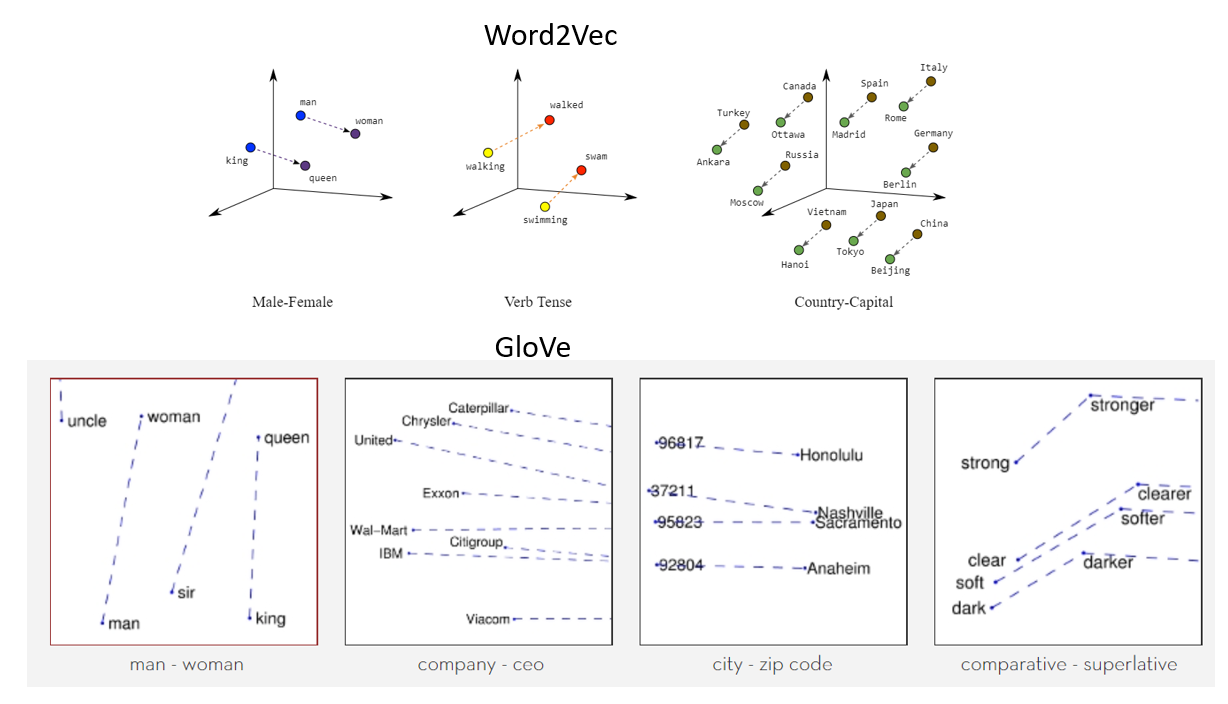



### Experiment

We did an experiment with Word2Vec trained with the dutch wikipedia vocabulary and ask for the ten words that are closest to "paprika": 

1.	courgette
2.	uien
3.	tomaten
4.	komkommer
5.	knoflook
6.	chilipepers
7.	aubergine
8.	tomaat
9.	groenten
10.	gekookte

It's amazing to see that all words are (related to) vegetables, although nobody told the system about vegetables.  It's purely because those words often appear in each others neighbourhood in wikipedia articles. 


### Transformers and Sentence Embedding

- Pretrained word embeddings were popular for several years, but this approach has its limits. In particular, a word has a single representation, no matter the context.
- For example, the word “right” is encoded the same way in “left and right” and “right and wrong”, even though it means two very different things. 
- In practice we have to deal with complete documents, consisting of sentences and paragraphs. 
- In a groundbreaking 2017 paper, a team of Google researchers suggested an architecture called the __transformer__, which was a new neural network architecture for natural language translation, that outformed existing machine translation systems. 
- Since 2018 progress has been astounding, with larger and larger transformer-based architectures trained on immense datasets.
- In 2018 OpenAI published their GPT paper “Improving Language Understanding by Generative Pre-Training”. 
- In 2019 Google’s BERT (Bidirectional Encoder Representations from Transformers) paper came out: it also demonstrated the effectiveness of self-supervised pretraining on a large corpus, using a similar architecture to GPT. 
- One of the applications of BERT and other transformers is _Sentence Embedding_, which can be used for turning complete documents into a sequence of numbers.   
- The Sentence Embedding model is pretrained on a variety of data, including Wikipedia, web news, web question-answer pages and discussion forums, and it performs well on sentence semantic similarity tasks:

![](img/sentence_embedding.png)

- Semantic similarity is a measure of the degree to which two pieces of text carry the same meaning.  
- In general, sentence embeddings have high dimensionality (>500 features each), therefore dimensionality reduction can be useful. 

